<a href="https://colab.research.google.com/github/mverschoor-phd/DataProcessing/blob/main/Example_SkewedData_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictive Modeling often had certain assumptions that make handling skewed data complex such as:



1.   Linearity (linear relationship btw predictor and target variables)
2.   No noise (no outliers included)
3.   No collinearity (if predictors are highly correlated, model will likely overfit)
4.   Normal distribution (reliable predictions often hinge on the normally distributed variables)
5.   Scale (distance-based algorithms expect data to be on standard scale for accurate predictions)

This template uses common dataset Boston Housing Prices and Scikit-learn to deal with skewed data.





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()

X = boston['data']
Y = boston['target']
cols = boston['feature_names']

df = pd.DataFrame(X, columns=cols)
df['Price'] = Y
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Previous examination showed that the variable CRIM is highly skewed, here is evidence of this variable's skew (calculates Fisher-Pearson standardized moment coefficient).

In [3]:
df['CRIM'].skew()

5.223148798243851

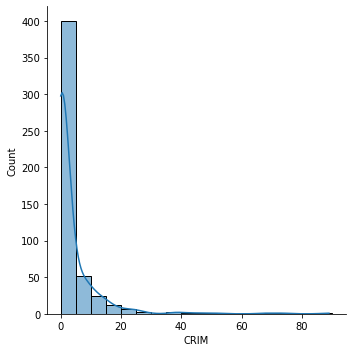

In [4]:
sns.displot(df, x='CRIM', binwidth=5, kde=True)

Log transform of the data

In [5]:
crim_log = np.log(df['CRIM'])
crim_log.skew()

0.4059344988496048

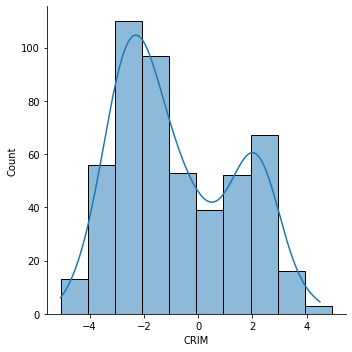

In [6]:
sns.displot(df, x=crim_log, binwidth=1,kde=True)

Log transformation reduces the skew, but data is still not normally distributed.

Let's try square root transformation next.

In [7]:
crim_sqrt = np.sqrt(df['CRIM'])
crim_sqrt.skew()

2.024382103123676

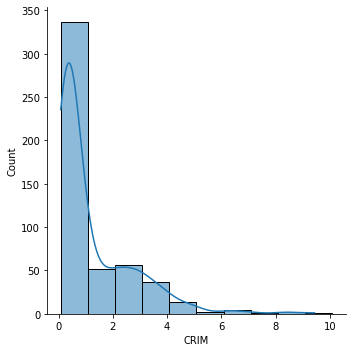

In [8]:
sns.displot(df, x=crim_sqrt, binwidth=1,kde=True)

The square root transformation is still the same distribution, but the range is smaller (as expected).

Let's try a Box-Cox Transformation next. 
(note that data must be positive to run this transformation).

Box Cox transformation estimates the value of lambda from -5 to 5 that maximizes the normality of the data. For negative values, a variant of the reciprocal of the variable is calculated; at lambda of zero it is log transformed; postive lambda leads to transformation to the power of lambda.

In [9]:
from scipy import stats

df['crim_boxcox'] = stats.boxcox(df['CRIM'])[0]
pd.Series(df['crim_boxcox']).skew()

0.09364917268984103

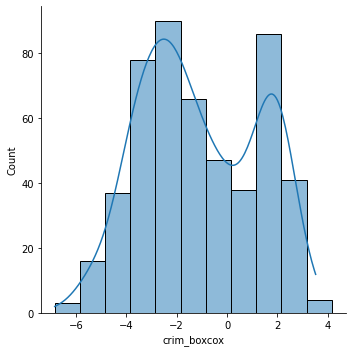

In [11]:
sns.displot(df, x=df['crim_boxcox'], binwidth=1,kde=True)

This distribution is similar to the one made by the log transform, but less bimodal.